In [45]:
from rdkit import rdBase
from rdkit import Chem
import pubchempy as pcp
print('rdkit version: {}'.format(rdBase.rdkitVersion))

rdkit version: 2019.03.2


In [25]:
suppl = Chem.SDMolSupplier('../サリチル酸メチル.sdf',removeHs=False)
mols=[]
for x in suppl:
    if x is not None:
        mols.append(x)
len(mols)

73

In [27]:
from rdkit.Chem import MACCSkeys as maccs
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem

In [18]:
m_fps_1 = maccs.GenMACCSKeys(mols[0])
m_fps_2 = maccs.GenMACCSKeys(mols[1])

In [48]:
m_mfp_1=AllChem.GetMorganFingerprintAsBitVect(mols[0], 2, 2048)
m_mfp_2=AllChem.GetMorganFingerprintAsBitVect(mols[1], 2, 2048)

In [49]:
DataStructs.TanimotoSimilarity(m_mfp_1, m_mfp_2)

0.6896551724137931

In [40]:
for prop in mols[0].GetPropNames():
    print(prop)

PRODUCT_NUMBER
PRODUCT_NAME
MOLECULAR_FORMULA
MOLECULAR_WEIGHT
CAS_NUMBER
MDL_NUMBER


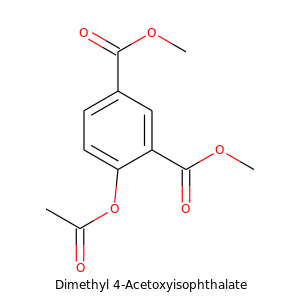

In [41]:
Draw.MolToImage(mols[2],legend=mols[2].GetProp('PRODUCT_NAME'))

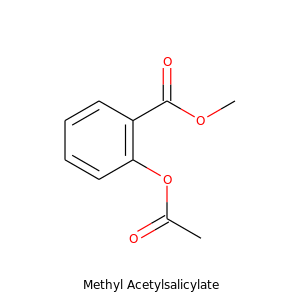

In [54]:
c6h6 = Chem.MolFromSmiles('c1ccccc1')
m=mols[0]
m.GetSubstructMatch(c6h6)
Draw.MolToImage(m,legend=m.GetProp('PRODUCT_NAME'))

In [64]:
import IPython.display

In [71]:
IPython.display.display_png(m)

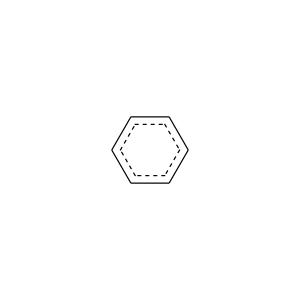

In [55]:
Draw.MolToImage(c6h6, kekulize=False)

In [58]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

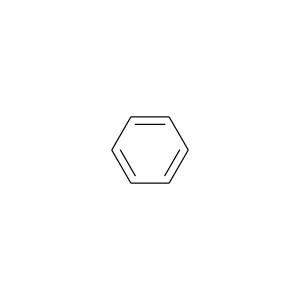

In [98]:
c6h6 = Chem.MolFromSmiles('c1ccccc1')
Chem.Kekulize(c6h6)
Draw.MolToImage(c6h6, kekulize=False)

In [99]:
Chem.MolToSmiles(c6h6)

'c1ccccc1'

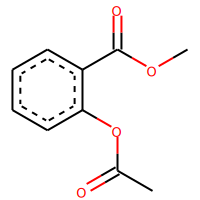

In [91]:
mds=rdMolDraw2D.MolDraw2DSVG(200,200)
mds.DrawMolecule(m)
mds.FinishDrawing()
mstr=mds.GetDrawingText()
mstr=mstr.replace('svg:','')
SVG(mstr)

In [6]:
len(m_fps_1.ToBinary())*8

280

In [7]:
len(m_fps_1.ToBitString())

167

In [8]:
from rdkit.Chem import Descriptors as des

In [9]:
dec_list=des.descList

calc = {}
for i,j in dec_list:
    calc[i] = j
lipinski_list = ['NumHDonors', 'NumHAcceptors', 'MolWt', 'MolLogP']
# Ro5を判定する関数たち
def calc_lipinsk(mol):
    lipinski = {}
    for desc in lipinski_list:
        lipinski[desc] = calc[desc](mol)
    return lipinski

def check_lipinski(dic):
    if dic['MolWt'] <= 500 and dic['MolLogP'] <= 5 and dic['NumHDonors'] <=5 and dic['NumHAcceptors'] <=10:
        return True
    else:
        return False
    
def rule_of_five(mol):
    prop = calc_lipinsk(mol)
    if check_lipinski(prop):
        return mol

In [10]:
lipinski_mols = []
bad_mols = []
for m in mols:
    if rule_of_five(m):
        lipinski_mols.append(m)
    else:
        bad_mols.append(m)

len(lipinski_mols), len(bad_mols)

(69, 4)

In [11]:
from rdkit.Chem import Draw

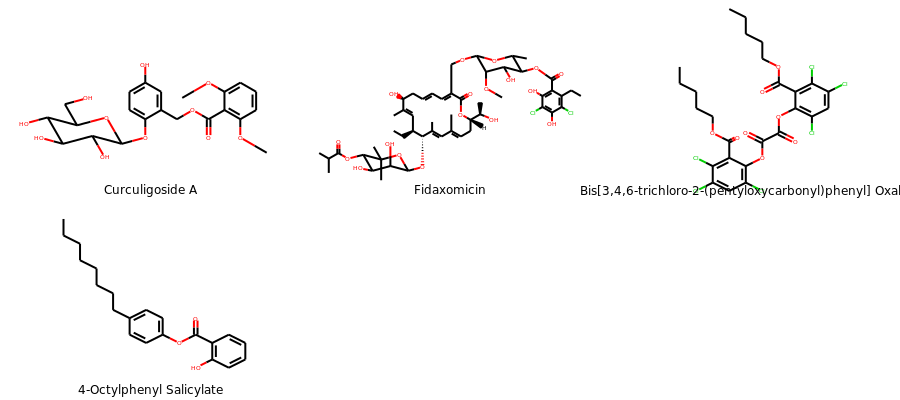

In [42]:
Draw.MolsToGridImage(bad_mols, molsPerRow=3, subImgSize=(300,200),
                     legends=[x.GetProp('PRODUCT_NAME') for x in bad_mols])

In [13]:
bad_mols

In [14]:
calc['MaxEStateIndex'](mols[0])

11.202226001511715